# Module 3:  Linear Regression
## Model Definition and Assessment

In [448]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('classic')
import seaborn as sns
advertising = pd.read_csv('Advertising.csv')
advertising

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Model Specification and Assessment

### Create simple linear regression to model sales as a function of TV advertising budget

Step 1:  Import the linear regression model class from sklearn

In [449]:
from sklearn.linear_model import LinearRegression

Step 2:  Instantiate the model and specify that we want to estimate the intercept as well as the slope by setting the fit_intercept hyperparameter to True

In [450]:
slr_model = LinearRegression(fit_intercept=True)

Step 3:  Arrange the data into a features matrix and a target vector

In [451]:
y = advertising['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [452]:
X = advertising[['TV']]  # the features matrix needs to be a Pandas dataframe or a 2-d NumPy array
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


Step 4:  Fit the model

In [453]:
slr_model.fit(X,y)

LinearRegression()

Investigate the fitted coefficients:

In [454]:
slr_model.coef_

array([0.04753664])

In [455]:
slr_model.intercept_

7.032593549127694

Plot the model against the data

In [456]:
x_fit = np.linspace(0,300, num = 500) # Create an array of 500 points from 0 to 300 (max TV budget)
x_fit = x_fit[:,np.newaxis]  # Reshape the array to be in the correct format for sklearn methods
x_fit.shape

(500, 1)

In [457]:
y_fit = slr_model.predict(x_fit) 

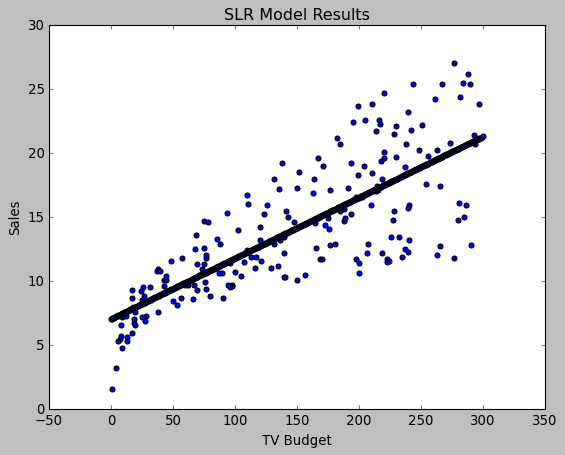

In [458]:
plt.scatter(x = X, y = y)
plt.scatter(x = x_fit, y = y_fit)
plt.title('SLR Model Results')
plt.xlabel('TV Budget')
plt.ylabel('Sales')
p1 = plt.show()

Find the predictions for the training data

In [459]:
y_hat = slr_model.predict(X)

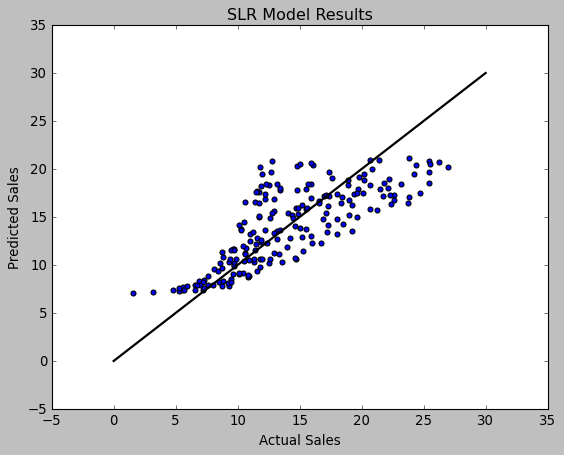

In [460]:
#  Plot the predictions against the actual values to get a sense of the model performance
plt.scatter(x = y, y = y_hat)
plt.title('SLR Model Results')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([0, 30], [0, 30], color = 'black', linewidth = 2)
p1 = plt.show()

Plot the residuals against the actual values of y

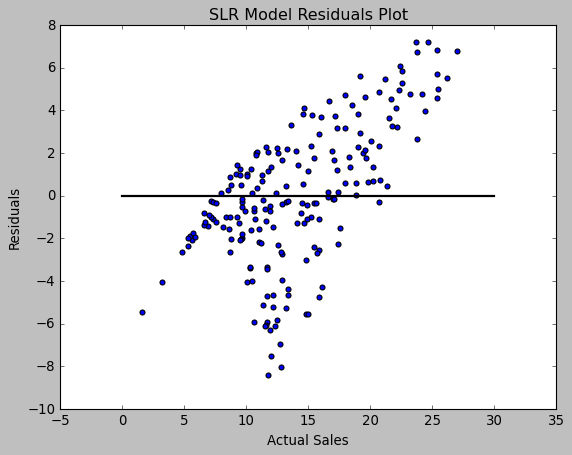

In [461]:
residuals = y - y_hat
plt.scatter(x= y, y = residuals)
plt.title('SLR Model Residuals Plot')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.plot([0, 30], [0,0], color = 'black', linewidth = 2)
p1 = plt.show()

#### Using statsmodel to find p-values of coefficients

In [462]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [463]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [464]:
X_b = sm.add_constant(X)
X_b

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8
...,...,...
195,1.0,38.2
196,1.0,94.2
197,1.0,177.0
198,1.0,283.6


In [465]:
slr_model2 = sm.OLS(y,X_b)
slr_model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           1.47e-42
Time:                        13:02:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Considering a model with no relationship between predictor and response

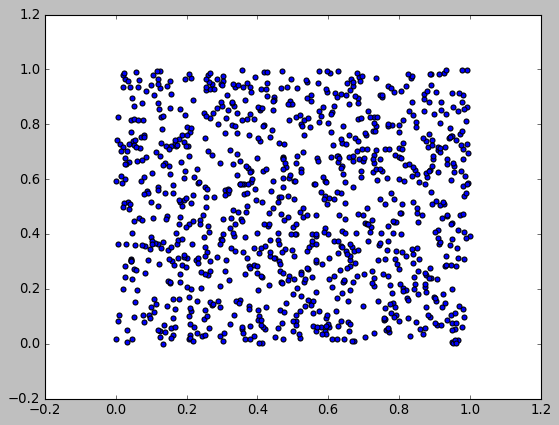

In [466]:
x_random = np.random.uniform(0,1,1000)
y_random = np.random.uniform(0,1,1000)
plt.scatter(x_random, y_random)

In [467]:
sm.OLS(y_random, sm.add_constant(x_random)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1509
Date:                Sun, 10 Jul 2022   Prob (F-statistic):              0.698
Time:                        13:02:48   Log-Likelihood:                -187.18
No. Observations:                1000   AIC:                             378.4
Df Residuals:                     998   BIC:                             388.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5066      0.019     27.140      0.000       0.470       0.543
x1            -0.0125      0.032     -0.389      0.698      -0.076       0.051
==============================================================================
Omnibus:                      757.113   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.384
Skew:                          -0.009   Prob(JB):                     7.72e-14
Kurtosis:                       1.796   Cond. No.                         4.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assessing the Accuracy of the Model

Assess the model's fit to the data

In [468]:
slr_model.score(X,y)  # R-Square is the default score for linear regression models

0.611875050850071

In [469]:
from sklearn import metrics
metrics.r2_score(y, y_hat)

0.611875050850071

In [470]:
metrics.mean_squared_error(y, y_hat)

10.512652915656759

In [471]:
metrics.mean_absolute_error(y, y_hat)

2.549806038927486

In [472]:
metrics.max_error(y, y_hat)

8.38598195694426

Find the Residual Standard Error (RSE)

In [473]:
slr_model2_rse = np.sqrt(slr_model2.fit().mse_resid)
slr_model2_rse

3.2586563686504624

In [474]:
slr_model2.fit().df_resid

198.0

In [475]:
slr_model2_rse = np.sqrt(sum(slr_model2.fit().resid**2)/slr_model2.fit().df_resid)
slr_model2_rse

3.258656368650462

## Create multiple linear regression to model sales as a function of all budgets

Instantiate a new model

In [476]:
mlr_model = LinearRegression(fit_intercept=True)

Prepare the data

In [477]:
y = advertising['sales']
X2 = advertising[['TV', 'radio', 'newspaper']]
X2

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


Fit the model

In [478]:
mlr_model.fit(X2,y)

LinearRegression()

Investigate the model

In [479]:
mlr_model.intercept_

2.9388893694594067

In [480]:
mlr_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

Plot the predictions against the data

In [481]:
y_hat = mlr_model.predict(X2)

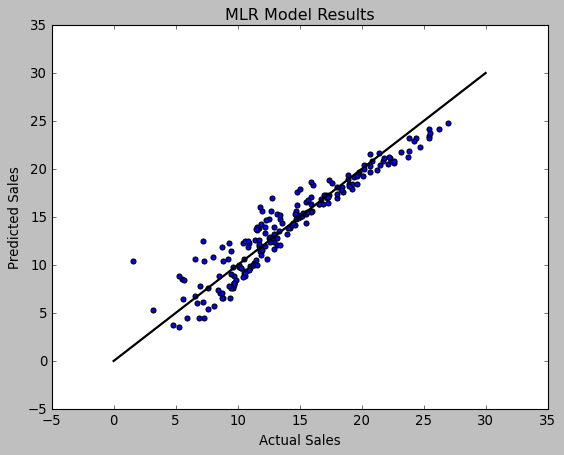

In [482]:
#  Plot the residuals against the actual values
plt.scatter(x = y, y = y_hat)
plt.title('MLR Model Results')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([0, 30], [0, 30], color = 'black', linewidth = 2)
p1 = plt.show()

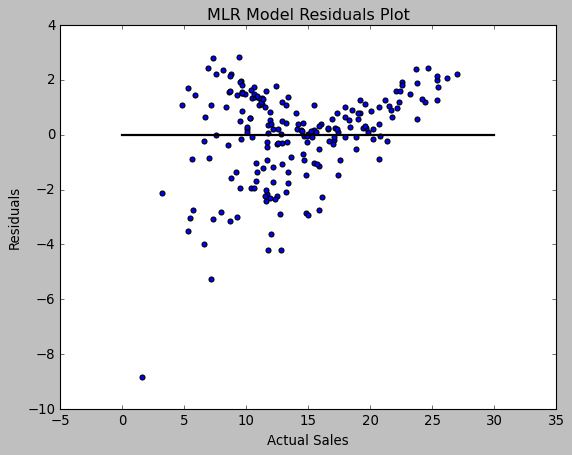

In [483]:
#  Plot the residuals against the actual values
residuals = y - y_hat
plt.scatter(x= y, y = residuals)
plt.title('MLR Model Residuals Plot')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.plot([0, 30], [0,0], color = 'black', linewidth = 2)
p1 = plt.show()

<AxesSubplot:xlabel='sales'>

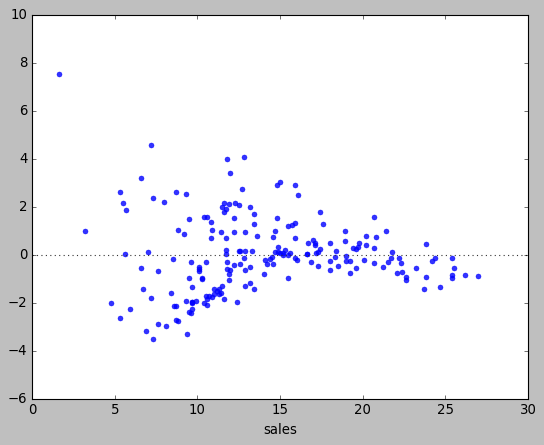

In [484]:
sns.residplot(x = y, y = mlr_model.predict(X2))

Assess the model's fit to the data

In [485]:
metrics.r2_score(y, y_hat)

0.8972106381789522

In [486]:
metrics.mean_squared_error(y, y_hat)

2.784126314510936

In [487]:
metrics.mean_absolute_error(y, y_hat)

1.2520112296870687

#### Coefficient Significance Analysis

Looking at other possible SLR models

In [488]:
sm.OLS(y,sm.add_constant(advertising['radio'])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           4.35e-19
Time:                        13:02:48   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [489]:
sm.OLS(y,sm.add_constant(advertising['newspaper'])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sun, 10 Jul 2022   Prob (F-statistic):            0.00115
Time:                        13:02:48   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [490]:
sm.OLS(y,sm.add_constant(advertising[['TV', 'radio','newspaper']])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        13:02:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [491]:
advertising[['TV', 'radio','newspaper']].corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


Assessing random predictors and responses for MLR model

In [492]:
y_random = np.random.uniform(0,1,1000)
x_random = pd.DataFrame(np.array([np.random.uniform(0,1,1000), np.random.uniform(0,1,1000), 
                                  np.random.uniform(0,1,1000)]).T)
x_random.columns = ['X1', 'X2', 'X3']
x_random

,X1,X2,X3
0,0.079798,0.278948,0.121808
1,0.262686,0.687016,0.248104
2,0.826048,0.829990,0.687709
3,0.402081,0.756834,0.652595
4,0.139294,0.327221,0.381533
...,...,...,...
995,0.605614,0.960506,0.868798
996,0.834734,0.553463,0.811602
997,0.670081,0.965132,0.868620
998,0.352741,0.303009,0.585286


In [493]:
sm.OLS(y_random, sm.add_constant(x_random)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1764
Date:                Sun, 10 Jul 2022   Prob (F-statistic):              0.912
Time:                        13:02:48   Log-Likelihood:                -181.44
No. Observations:                1000   AIC:                             370.9
Df Residuals:                     996   BIC:                             390.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4999      0.030     16.941      0.000       0.442       0.558
X1             0.0154      0.032      0.480      0.632      -0.048       0.079
X2             0.0175      0.031      0.556      0.578      -0.044       0.079
X3            -0.0018      0.032     -0.057      0.954      -0.065       0.061
==============================================================================
Omnibus:                      744.007   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.861
Skew:                          -0.066   Prob(JB):                     6.08e-14
Kurtosis:                       1.799   Cond. No.                         6.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Extensions

###  Initial Model

In [494]:
cars = pd.read_csv("Cars Data.csv")
cars

,Make,Model,DriveTrain,Origin,Type,Cylinders,Engine Size (L),Horsepower,Invoice,Length (IN),MPG (City),MPG (Highway),MSRP,Weight (LBS),Wheelbase (IN)
0,Acura,3.5 RL 4dr,Front,Asia,Sedan,6.0,3.5,225,"$39,014",197,18,24,"$43,755",3880,115
1,Acura,3.5 RL w/Navigation 4dr,Front,Asia,Sedan,6.0,3.5,225,"$41,100",197,18,24,"$46,100",3893,115
2,Acura,MDX,All,Asia,SUV,6.0,3.5,265,"$33,337",189,17,23,"$36,945",4451,106
3,Acura,NSX coupe 2dr manual S,Rear,Asia,Sports,6.0,3.2,290,"$79,978",174,17,24,"$89,765",3153,100
4,Acura,RSX Type S 2dr,Front,Asia,Sedan,4.0,2.0,200,"$21,761",172,24,31,"$23,820",2778,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,S80 2.9 4dr,Front,Europe,Sedan,6.0,2.9,208,"$35,542",190,20,28,"$37,730",3576,110
424,Volvo,S80 T6 4dr,Front,Europe,Sedan,6.0,2.9,268,"$42,573",190,19,26,"$45,210",3653,110
425,Volvo,V40,Front,Europe,Wagon,4.0,1.9,170,"$24,641",180,22,29,"$26,135",2822,101
426,Volvo,XC70,All,Europe,Wagon,5.0,2.5,208,"$33,112",186,20,27,"$35,145",3823,109


Drop irrelevant variables

In [495]:
cars_mech = cars.drop(['Make', 'Model', 'Origin', 'MSRP', 'Invoice', 'MPG (City)'], axis = 1)
cars_mech

,DriveTrain,Type,Cylinders,Engine Size (L),Horsepower,Length (IN),MPG (Highway),Weight (LBS),Wheelbase (IN)
0,Front,Sedan,6.0,3.5,225,197,24,3880,115
1,Front,Sedan,6.0,3.5,225,197,24,3893,115
2,All,SUV,6.0,3.5,265,189,23,4451,106
3,Rear,Sports,6.0,3.2,290,174,24,3153,100
4,Front,Sedan,4.0,2.0,200,172,31,2778,101
...,...,...,...,...,...,...,...,...,...
423,Front,Sedan,6.0,2.9,208,190,28,3576,110
424,Front,Sedan,6.0,2.9,268,190,26,3653,110
425,Front,Wagon,4.0,1.9,170,180,29,2822,101
426,All,Wagon,5.0,2.5,208,186,27,3823,109


Convert cyllinders to be a category

In [496]:
cars_mech['Cylinders'] = pd.Categorical(cars_mech['Cylinders'])
cars_mech.dtypes

DriveTrain           object
Type                 object
Cylinders          category
Engine Size (L)     float64
Horsepower            int64
Length (IN)           int64
MPG (Highway)         int64
Weight (LBS)          int64
Wheelbase (IN)        int64
dtype: object

Look at correlation matrix

In [497]:
cars_mech.corr()

,Engine Size (L),Horsepower,Length (IN),MPG (Highway),Weight (LBS),Wheelbase (IN)
Engine Size (L),1.000000,0.787435,0.637448,-0.717302,0.807867,0.636517
Horsepower,0.787435,1.000000,0.381554,-0.647195,0.630796,0.387398
Length (IN),0.637448,0.381554,1.000000,-0.466092,0.690021,0.889195
MPG (Highway),-0.717302,-0.647195,-0.466092,1.000000,-0.790989,-0.524661
Weight (LBS),0.807867,0.630796,0.690021,-0.790989,1.000000,0.760703
Wheelbase (IN),0.636517,0.387398,0.889195,-0.524661,0.760703,1.000000


Initial model with numeric variables

In [498]:
cars_mpg_model_1 = LinearRegression(fit_intercept = True)
y3 = cars_mech['MPG (Highway)']
X3 = cars_mech.drop('MPG (Highway)', axis = 1)
X3 = X3.select_dtypes('number')
X3.dtypes

Engine Size (L)    float64
Horsepower           int64
Length (IN)          int64
Weight (LBS)         int64
Wheelbase (IN)       int64
dtype: object

In [499]:
cars_mpg_model_1.fit(X3,y3)
cars_mpg_model_1.intercept_

38.44699568492957

In [500]:
cars_mpg_model_1.coef_

array([-0.6003969 , -0.01396653,  0.04736906, -0.00533632,  0.03325118])

In [501]:
metrics.r2_score(y3, cars_mpg_model_1.predict(X3))

0.6737980004084889

In [502]:
metrics.mean_squared_error(y3, cars_mpg_model_1.predict(X3))

10.726948257060153

<AxesSubplot:xlabel='MPG (Highway)'>

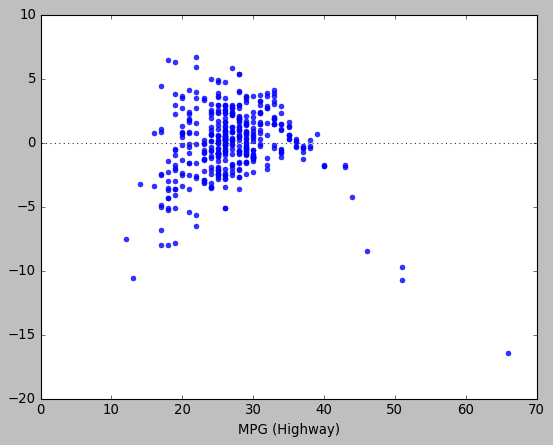

In [503]:
sns.residplot(x = y3, y = cars_mpg_model_1.predict(X3))

### Incorporating Categorical Predictors

In [504]:
cars_mech

,DriveTrain,Type,Cylinders,Engine Size (L),Horsepower,Length (IN),MPG (Highway),Weight (LBS),Wheelbase (IN)
0,Front,Sedan,6.0,3.5,225,197,24,3880,115
1,Front,Sedan,6.0,3.5,225,197,24,3893,115
2,All,SUV,6.0,3.5,265,189,23,4451,106
3,Rear,Sports,6.0,3.2,290,174,24,3153,100
4,Front,Sedan,4.0,2.0,200,172,31,2778,101
...,...,...,...,...,...,...,...,...,...
423,Front,Sedan,6.0,2.9,208,190,28,3576,110
424,Front,Sedan,6.0,2.9,268,190,26,3653,110
425,Front,Wagon,4.0,1.9,170,180,29,2822,101
426,All,Wagon,5.0,2.5,208,186,27,3823,109


In [505]:
pd.get_dummies(cars['DriveTrain'])

,All,Front,Rear
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
423,0,1,0
424,0,1,0
425,0,1,0
426,1,0,0


In [506]:
# Make rear-wheel drive the "default"
cars_mech['DriveTrain - All'] = pd.get_dummies(cars['DriveTrain'])['All']
cars_mech['DriveTrain - Front'] = pd.get_dummies(cars['DriveTrain'])['Front']
cars_mech

,DriveTrain,Type,Cylinders,Engine Size (L),Horsepower,Length (IN),MPG (Highway),Weight (LBS),Wheelbase (IN),DriveTrain - All,DriveTrain - Front
0,Front,Sedan,6.0,3.5,225,197,24,3880,115,0,1
1,Front,Sedan,6.0,3.5,225,197,24,3893,115,0,1
2,All,SUV,6.0,3.5,265,189,23,4451,106,1,0
3,Rear,Sports,6.0,3.2,290,174,24,3153,100,0,0
4,Front,Sedan,4.0,2.0,200,172,31,2778,101,0,1
...,...,...,...,...,...,...,...,...,...,...,...
423,Front,Sedan,6.0,2.9,208,190,28,3576,110,0,1
424,Front,Sedan,6.0,2.9,268,190,26,3653,110,0,1
425,Front,Wagon,4.0,1.9,170,180,29,2822,101,0,1
426,All,Wagon,5.0,2.5,208,186,27,3823,109,1,0


In [507]:
pd.get_dummies(cars_mech['Type'])

,Hybrid,SUV,Sedan,Sports,Truck,Wagon
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
423,0,0,1,0,0,0
424,0,0,1,0,0,0
425,0,0,0,0,0,1
426,0,0,0,0,0,1


In [508]:
# Make Sedan the default
cars_mech['Type - Hybrid'] = pd.get_dummies(cars['Type'])['Hybrid']
cars_mech['Type - SUV'] = pd.get_dummies(cars['Type'])['SUV']
cars_mech['Type - Sports'] = pd.get_dummies(cars['Type'])['Sports']
cars_mech['Type - Truck'] = pd.get_dummies(cars['Type'])['Truck']
cars_mech['Type - Wagon'] = pd.get_dummies(cars['Type'])['Wagon']

In [509]:
pd.get_dummies(cars_mech['Cylinders'])

,3.0,4.0,5.0,6.0,8.0,10.0,12.0
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
423,0,0,0,1,0,0,0
424,0,0,0,1,0,0,0
425,0,1,0,0,0,0,0
426,0,0,1,0,0,0,0


In [510]:
# Make six-cyllinder cars the default
cars_mech['Cylinders - 3'] = pd.get_dummies(cars['Cylinders'])[3.0]
cars_mech['Cylinders - 4'] = pd.get_dummies(cars['Cylinders'])[4.0]
cars_mech['Cylinders - 5'] = pd.get_dummies(cars['Cylinders'])[5.0]
cars_mech['Cylinders - 8'] = pd.get_dummies(cars['Cylinders'])[8.0]
cars_mech['Cylinders - 10'] = pd.get_dummies(cars['Cylinders'])[10.0]
cars_mech['Cylinders - 12'] = pd.get_dummies(cars['Cylinders'])[12.0]

In [511]:
cars_mech.columns

Index(['DriveTrain', 'Type', 'Cylinders', 'Engine Size (L)', 'Horsepower',
       'Length (IN)', 'MPG (Highway)', 'Weight (LBS)', 'Wheelbase (IN)',
       'DriveTrain - All', 'DriveTrain - Front', 'Type - Hybrid', 'Type - SUV',
       'Type - Sports', 'Type - Truck', 'Type - Wagon', 'Cylinders - 3',
       'Cylinders - 4', 'Cylinders - 5', 'Cylinders - 8', 'Cylinders - 10',
       'Cylinders - 12'],
      dtype='object')

In [512]:
cars_mpg_model_2 = LinearRegression(fit_intercept = True)
y = cars_mech['MPG (Highway)']
X = cars_mech.drop('MPG (Highway)', axis = 1)
X = X.select_dtypes('number')
X.dtypes

Engine Size (L)       float64
Horsepower              int64
Length (IN)             int64
Weight (LBS)            int64
Wheelbase (IN)          int64
DriveTrain - All        uint8
DriveTrain - Front      uint8
Type - Hybrid           uint8
Type - SUV              uint8
Type - Sports           uint8
Type - Truck            uint8
Type - Wagon            uint8
Cylinders - 3           uint8
Cylinders - 4           uint8
Cylinders - 5           uint8
Cylinders - 8           uint8
Cylinders - 10          uint8
Cylinders - 12          uint8
dtype: object

In [513]:
cars_mpg_model_2.fit(X,y)
cars_mpg_model_2.intercept_

34.508820072938015

In [514]:
pd.DataFrame(cars_mpg_model_2.coef_, columns = ["Coefficients"], 
             index = X.columns)

,Coefficients
Engine Size (L),-0.533936
Horsepower,-0.012232
Length (IN),0.018863
Weight (LBS),-0.003440
Wheelbase (IN),0.044207
DriveTrain - All,-0.147600
DriveTrain - Front,1.031903
Type - Hybrid,17.370264
Type - SUV,-3.181807
Type - Sports,-1.039186


In [515]:
metrics.r2_score(y, cars_mpg_model_2.predict(X))

0.8526382117756819

In [516]:
metrics.mean_squared_error(y, cars_mpg_model_2.predict(X))

4.84590002308267

<AxesSubplot:xlabel='MPG (Highway)'>

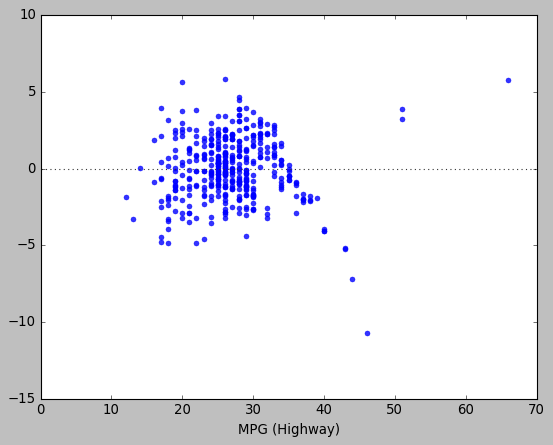

In [517]:
sns.residplot(x = y, y = cars_mpg_model_2.predict(X) )

### Adding Nonlinear Variables

<AxesSubplot:xlabel='Horsepower', ylabel='MPG (Highway)'>

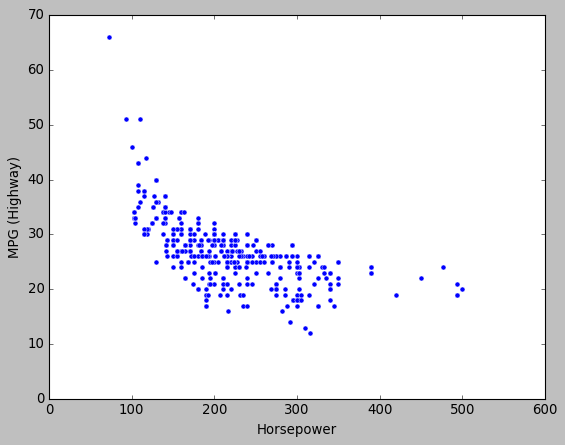

In [518]:
sns.scatterplot(data = cars_mech, y = "MPG (Highway)", x = "Horsepower")

<AxesSubplot:xlabel='Engine Size (L)', ylabel='MPG (Highway)'>

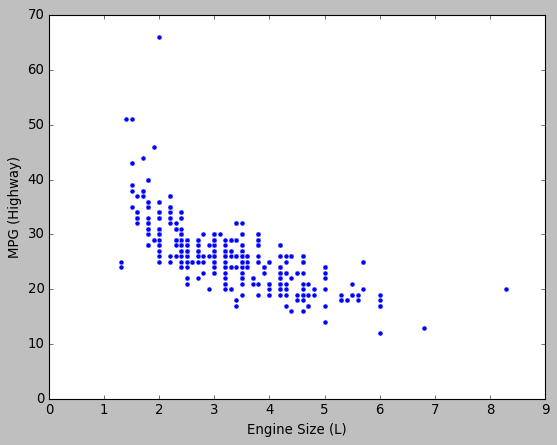

In [519]:
sns.scatterplot(data = cars_mech, y = "MPG (Highway)", x = "Engine Size (L)")

<AxesSubplot:xlabel='Weight (LBS)', ylabel='MPG (Highway)'>

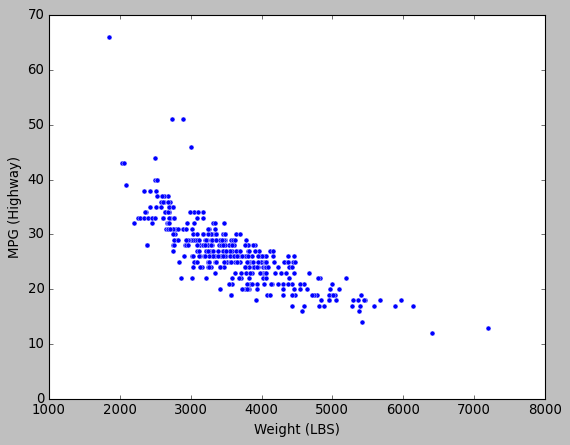

In [520]:
sns.scatterplot(data = cars_mech, y = "MPG (Highway)", x = "Weight (LBS)")

<AxesSubplot:xlabel='Wheelbase (IN)', ylabel='MPG (Highway)'>

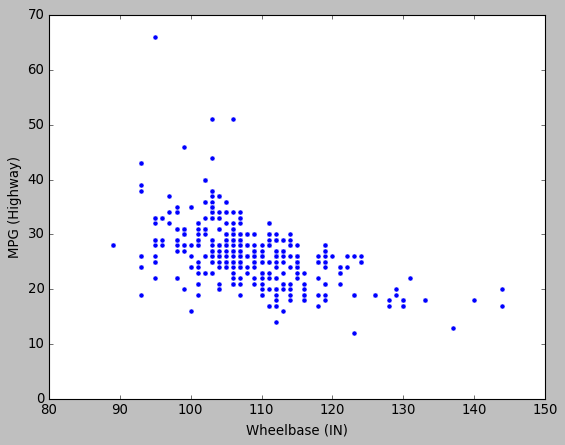

In [521]:
sns.scatterplot(data = cars_mech, y = "MPG (Highway)", x = "Wheelbase (IN)")

####  Adding a square term of horsepower to model

In [525]:
cars_mech['HP^2'] = cars_mech['Horsepower']**2
cars_mech

,DriveTrain,Type,Cylinders,Engine Size (L),Horsepower,Length (IN),MPG (Highway),Weight (LBS),Wheelbase (IN),DriveTrain - All,...,Type - Sports,Type - Truck,Type - Wagon,Cylinders - 3,Cylinders - 4,Cylinders - 5,Cylinders - 8,Cylinders - 10,Cylinders - 12,HP^2
0,Front,Sedan,6.0,3.5,225,197,24,3880,115,0,...,0,0,0,0,0,0,0,0,0,50625
1,Front,Sedan,6.0,3.5,225,197,24,3893,115,0,...,0,0,0,0,0,0,0,0,0,50625
2,All,SUV,6.0,3.5,265,189,23,4451,106,1,...,0,0,0,0,0,0,0,0,0,70225
3,Rear,Sports,6.0,3.2,290,174,24,3153,100,0,...,1,0,0,0,0,0,0,0,0,84100
4,Front,Sedan,4.0,2.0,200,172,31,2778,101,0,...,0,0,0,0,1,0,0,0,0,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Front,Sedan,6.0,2.9,208,190,28,3576,110,0,...,0,0,0,0,0,0,0,0,0,43264
424,Front,Sedan,6.0,2.9,268,190,26,3653,110,0,...,0,0,0,0,0,0,0,0,0,71824
425,Front,Wagon,4.0,1.9,170,180,29,2822,101,0,...,0,0,1,0,1,0,0,0,0,28900
426,All,Wagon,5.0,2.5,208,186,27,3823,109,1,...,0,0,1,0,0,1,0,0,0,43264


In [405]:
y = cars_mech['MPG (Highway)']
X = cars_mech.drop('MPG (Highway)', axis = 1).copy()

In [526]:
cars_mpg_model_3 = LinearRegression(fit_intercept = True)
cars_mpg_model_3.fit(X,y)
cars_mpg_model_3.intercept_

34.508820072938015

In [527]:
# Display coefficients in a more readable format
pd.DataFrame(cars_mpg_model_3.coef_, columns = ['Coefficients'], index = X.columns)

,Coefficients
Engine Size (L),-0.533936
Horsepower,-0.012232
Length (IN),0.018863
Weight (LBS),-0.003440
Wheelbase (IN),0.044207
DriveTrain - All,-0.147600
DriveTrain - Front,1.031903
Type - Hybrid,17.370264
Type - SUV,-3.181807
Type - Sports,-1.039186


In [528]:
metrics.r2_score(y, cars_mpg_model_3.predict(X))

0.8526382117756819

In [529]:
metrics.mean_squared_error(y, cars_mpg_model_3.predict(X))

4.84590002308267

<AxesSubplot:xlabel='MPG (Highway)'>

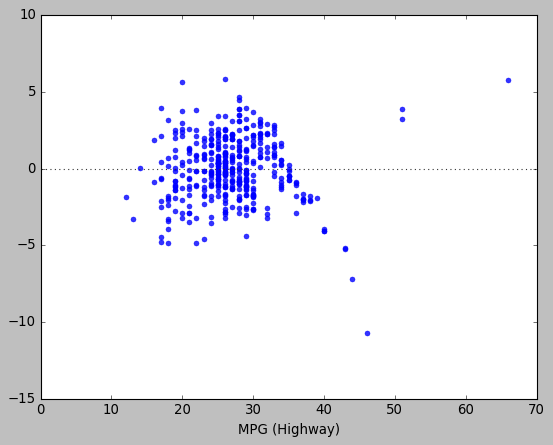

In [531]:
# Residuals plot
sns.residplot(x = y, y = cars_mpg_model_3.predict(X))

### Adding Interaction Effects

#### Advertising Example

In [411]:
advertising['radio x tv'] = advertising['radio'] * advertising['TV']
advertising

,TV,radio,newspaper,sales,radio x tv
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85
2,17.2,45.9,69.3,9.3,789.48
3,151.5,41.3,58.5,18.5,6256.95
4,180.8,10.8,58.4,12.9,1952.64
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,141.34
196,94.2,4.9,8.1,9.7,461.58
197,177.0,9.3,6.4,12.8,1646.10
198,283.6,42.0,66.2,25.5,11911.20


In [412]:
# Using statsmodels in order to get p-values of coefficients
advertising_interaction_model = sm.OLS(advertising['sales'], 
                                       sm.add_constant(advertising.drop(['sales', 'newspaper'], axis = 1)))
advertising_interaction_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          6.68e-146
Time:                        12:37:01   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
radio x tv     0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [413]:
# Comparing to model using only radio and TV
advertising_interaction_model = sm.OLS(advertising['sales'], 
                                       sm.add_constant(advertising[['TV', 'radio']]))
advertising_interaction_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           4.83e-98
Time:                        12:37:01   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interacitons with categorical predictors

In [532]:
credit = pd.read_csv('Credit.csv')
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,903
2,104.593,7075,514,4,71,11,Male,No,No,580
3,148.924,9504,681,3,36,11,Female,No,No,964
4,55.882,4897,357,2,68,16,Male,No,Yes,331
...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,560
396,13.364,3838,296,5,65,17,Male,No,No,480
397,57.872,4171,321,5,67,12,Female,No,Yes,138
398,37.728,2525,192,1,44,13,Male,No,Yes,0


Predicting balance from income and student status

In [540]:
X_credit = credit[['Income','Student']].copy()
X_credit['Student - Binary'] = pd.get_dummies(X_credit['Student'])['Yes']
X_credit = X_credit.drop('Student', axis = 1)
X_credit

,Income,Student - Binary
0,14.891,0
1,106.025,1
2,104.593,0
3,148.924,0
4,55.882,0
...,...,...
395,12.096,0
396,13.364,0
397,57.872,0
398,37.728,0


In [542]:
credit_model_1 = LinearRegression(fit_intercept = True)
credit_model_1.fit(X_credit, credit['Balance'])
credit_model_1.intercept_

211.14296439806378

In [543]:
pd.DataFrame(credit_model_1.coef_, columns = ["Coefficients"], 
             index = X_credit.columns)

,Coefficients
Income,5.984336
Student - Binary,382.670539


In [548]:
metrics.r2_score(credit['Balance'], credit_model_1.predict(X_credit))

0.27745888896675686

In [550]:
np.sqrt(metrics.mean_squared_error(credit['Balance'], credit_model_1.predict(X_credit)))

390.31735054919494

Plot prediction vs actual

<AxesSubplot:xlabel='Balance'>

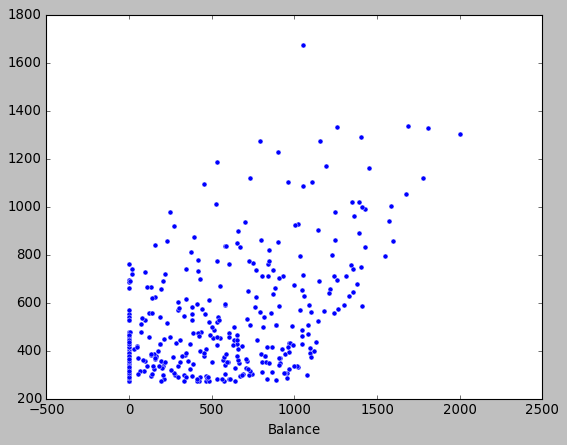

In [557]:
sns.scatterplot(y=credit_model_1.predict(X_credit), x=credit['Balance'])

Residuals plot

<AxesSubplot:xlabel='Balance'>

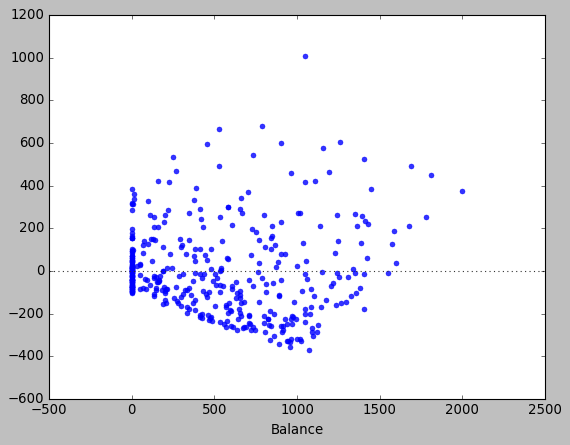

In [558]:
sns.residplot(y=credit_model_1.predict(X_credit), x=credit['Balance'])

####  Investigate adding an interaction effect

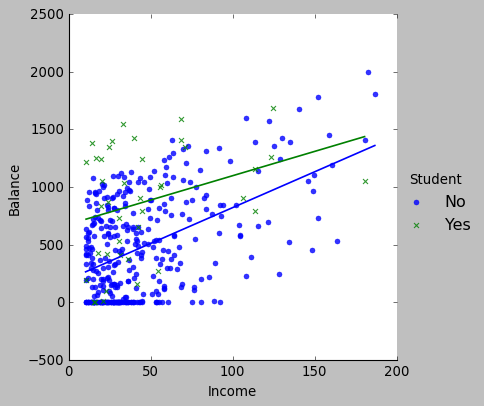

In [544]:
sns.lmplot(x = "Income", y = "Balance", hue = "Student", markers = ["o",'x'], ci = None, data = credit)

In [559]:
X_credit_2 = X_credit.copy()
X_credit_2['Student * Income'] = X_credit_2['Student - Binary'] * X_credit_2['Income']
X_credit_2

,Income,Student - Binary,Student * Income
0,14.891,0,0.000
1,106.025,1,106.025
2,104.593,0,0.000
3,148.924,0,0.000
4,55.882,0,0.000
...,...,...,...
395,12.096,0,0.000
396,13.364,0,0.000
397,57.872,0,0.000
398,37.728,0,0.000


In [560]:
credit_model_2 = LinearRegression(fit_intercept = True)
credit_model_2.fit(X_credit_2, credit['Balance'])
credit_model_2.intercept_

200.62315294978134

In [562]:
pd.DataFrame(credit_model_2.coef_, columns = ["Coefficients"], 
             index = X_credit_2.columns)

,Coefficients
Income,6.218169
Student - Binary,476.675843
Student * Income,-1.999151


In [563]:
metrics.r2_score(credit['Balance'], credit_model_2.predict(X_credit_2))

0.27988370306198973

In [566]:
np.sqrt(metrics.mean_squared_error(credit['Balance'], credit_model_2.predict(X_credit_2)))

389.66185677041574